# Experiment 10 by Shubharthak, 20BCS6872 
### Aim: Write a program to generate noisy image and implement different filter to remove the noise

In [1]:
#Adding path to sys path variable
import sys
sys.path.append('/home/shubharthak/miniconda3/lib/python3.11/site-packages')


Menu:
1. Load Image
2. Add Noise
3. Apply Median Filter
4. Apply Gaussian Filter
5. Exit
Enter your choice (1-5): 1
Enter the path to the image: sample.jpg


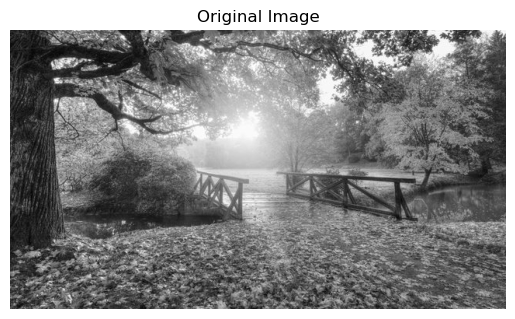


Menu:
1. Load Image
2. Add Noise
3. Apply Median Filter
4. Apply Gaussian Filter
5. Exit
Enter your choice (1-5): 2
Enter noise type (gaussian or salt_and_pepper): gaussian


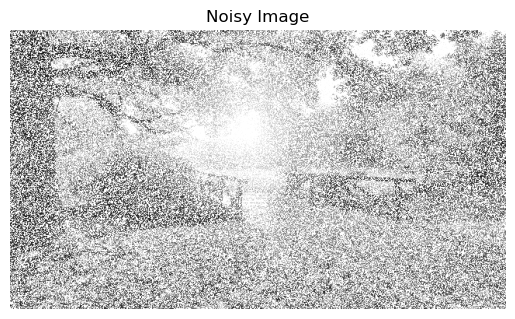


Menu:
1. Load Image
2. Add Noise
3. Apply Median Filter
4. Apply Gaussian Filter
5. Exit
Enter your choice (1-5): 3
Enter kernel size for median filter: 7


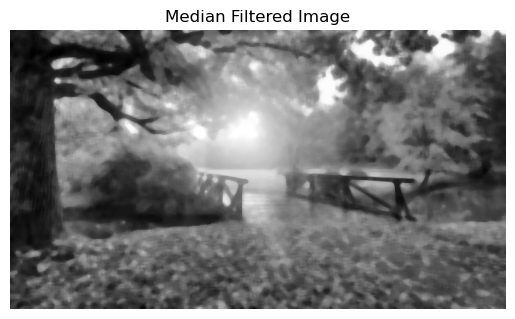


Menu:
1. Load Image
2. Add Noise
3. Apply Median Filter
4. Apply Gaussian Filter
5. Exit
Enter your choice (1-5): 5
Exiting program.


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_noise(image, noise_type='gaussian', mean=0, std_dev=25):
    noisy_image = np.copy(image)
    if noise_type == 'gaussian':
        noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
    elif noise_type == 'salt_and_pepper':
        prob = 0.05
        rnd = np.random.rand(*image.shape)
        noisy_image[rnd < prob / 2] = 0
        noisy_image[rnd > 1 - prob / 2] = 255
    return noisy_image

def apply_filters(image, filter_type='median', kernel_size=5):
    if filter_type == 'median':
        filtered_image = cv2.medianBlur(image, kernel_size)
    elif filter_type == 'gaussian':
        filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    elif filter_type == 'bilateral':
        filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
    return filtered_image

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    image = None
    while True:
        print("\nMenu:")
        print("1. Load Image")
        print("2. Add Noise")
        print("3. Apply Median Filter")
        print("4. Apply Gaussian Filter")
        print("5. Exit")
        choice = input("Enter your choice (1-5): ")

        if choice == '1':
            image_path = input("Enter the path to the image: ")
            image = cv2.imread(image_path, 0)
            display_image(image, 'Original Image')
        elif choice == '2':
            if image is not None:
                noise_type = input("Enter noise type (gaussian or salt_and_pepper): ")
                noisy_image = add_noise(image, noise_type=noise_type)
                display_image(noisy_image, 'Noisy Image')
            else:
                print("Please load an image first.")
        elif choice == '3':
            if image is not None:
                kernel_size = int(input("Enter kernel size for median filter: "))
                filtered_image = apply_filters(image, filter_type='median', kernel_size=kernel_size)
                display_image(filtered_image, 'Median Filtered Image')
            else:
                print("Please load an image first.")
        elif choice == '4':
            if image is not None:
                kernel_size = int(input("Enter kernel size for gaussian filter: "))
                filtered_image = apply_filters(image, filter_type='gaussian', kernel_size=kernel_size)
                display_image(filtered_image, 'Gaussian Filtered Image')
            else:
                print("Please load an image first.")
        elif choice == '5':
            print("Exiting program.")
            break
        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()